In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO
from zipfile import ZipFile

#Defining the url for the dataset
urlds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/Sp22/Team1_NYC_Restaurant_Inspections.zip"

#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.
csvdata=requests.get(urlds,verify=False).content  #this will generate a warning but you can proceed

zf = ZipFile(BytesIO(csvdata),'r')  #The dataset is being accessed from a zip file so this step is needed. 
#It might take a while for all of the data to be accessed. Be patient.

#Opening the dataset file and reading it into a data frame called "data"
data=pd.read_csv(zf.open("Team1_DOHMH_NYC_Restaurant_Inspections.csv"))

data.columns = [c.replace(' ', '_') for c in data.columns]

print(data.columns.tolist())

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE_DESCRIPTION', 'INSPECTION_DATE', 'ACTION', 'VIOLATION_CODE', 'VIOLATION_DESCRIPTION', 'CRITICAL_FLAG', 'SCORE', 'GRADE', 'GRADE_DATE', 'RECORD_DATE', 'INSPECTION_TYPE', 'Latitude', 'Longitude', 'Community_Board', 'Council_District', 'Census_Tract', 'BIN', 'BBL', 'NTA']


In [2]:
!pip install nltk
import nltk #natural language toolkit
import re #regular experssions

     |████████████████████████████████| 1.5 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 763 kB 38.5 MB/s eta 0:00:01


In [3]:
nltk.download('stopwords') # eg. I, me, be, is, have, what
nltk.download('punkt') # tokenizer: articles --> sentences, sentences --> words

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
tokendata = data.dropna(subset=['GRADE','VIOLATION_DESCRIPTION'])

In [5]:
tokendata = tokendata[['GRADE','VIOLATION_DESCRIPTION']]

In [63]:
tokendatac = tokendata.loc[tokendata["GRADE"]=='C']

In [67]:
tokendatab = tokendata.loc[tokendata["GRADE"]=='B']

In [68]:
tokendataa = tokendata.loc[tokendata["GRADE"]=='A']

In [27]:
tokendatac.text = " ".join(d for d in tokendatac.VIOLATION_DESCRIPTION.astype(str))

In [7]:
# first way to do it
text = " ".join(d for d in data.VIOLATION_DESCRIPTION.astype(str))

In [28]:
tokens=nltk.word_tokenize(tokendatac.text) # tokenize text

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
mywords = [w.lower() for w in tokens]
revisedwords = [w for w in mywords if w.isalpha()] #words only

In [6]:
stopwords=nltk.corpus.stopwords.words("english")

In [31]:
stoppedwords=[w for w in revisedwords if not w in stopwords] #remove all the stop words

In [7]:
# or in this way
my_stops = nltk.corpus.stopwords.words('english')  
stop_pat = r'\b(?:{})\b'.format('|'.join(my_stops))  

def ReturnCleanText(text):
         text = text.lower()
         text = re.sub(r"\W+|_", ' ', text)
         return re.sub(stop_pat, '', text)

tokendata['clean_text'] = tokendata['VIOLATION_DESCRIPTION'].apply(ReturnCleanText)

In [8]:
tokendata['VIOLATION_DESCRIPTION'][10:20]

29        Food contact surface not properly maintained.
32    Non-food contact surface improperly constructe...
34    Non-food contact surface improperly constructe...
35    Filth flies or food/refuse/sewage-associated (...
39    Non-food contact surface improperly constructe...
42    Facility not vermin proof. Harborage or condit...
43    Plumbing not properly installed or maintained;...
44    Non-food contact surface improperly constructe...
46    Evidence of mice or live mice present in facil...
47           Hot food item not held at or above 140º F.
Name: VIOLATION_DESCRIPTION, dtype: object

In [9]:
tokendata['clean_text'][10:20]

29           food contact surface  properly maintained 
32    non food contact surface improperly constructe...
34    non food contact surface improperly constructe...
35    filth flies  food refuse sewage associated frs...
39    non food contact surface improperly constructe...
42    facility  vermin proof harborage  conditions c...
43    plumbing  properly installed  maintained anti ...
44    non food contact surface improperly constructe...
46    evidence  mice  live mice present  facility  f...
47                       hot food item  held    140º f 
Name: clean_text, dtype: object

In [10]:
tokendata.text = " ".join(d for d in tokendata.clean_text.astype(str))

In [11]:
tokens=nltk.word_tokenize(tokendata.text) # tokenize text

In [13]:
tokens[:10]

['facility',
 'vermin',
 'proof',
 'harborage',
 'conditions',
 'conducive',
 'attracting',
 'vermin',
 'premises',
 'allowing']

In [14]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
nltk.download('omw-1.4')
type(wnl)

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


nltk.stem.wordnet.WordNetLemmatizer

In [25]:
foodlemma = [wnl.lemmatize(t) for t in tokens] # plural to singular

In [34]:
type(foodlemma)

list

In [26]:
from nltk import FreqDist
fdist = FreqDist(foodlemma)
type(fdist)

nltk.probability.FreqDist

In [27]:
topkeys = fdist.most_common(30) # rank top 30 most frequent words
for pair in topkeys: 
    print (pair)

('food', 208225)
('non', 101142)
('contact', 97272)
('surface', 96440)
('properly', 90321)
('improperly', 87475)
('fly', 82692)
('equipment', 56446)
('maintained', 56109)
('used', 52156)
('vermin', 46422)
('constructed', 40779)
('unacceptable', 40553)
('material', 40553)
('sealed', 40496)
('raised', 40496)
('spaced', 40496)
('movable', 40496)
('allow', 40496)
('accessibility', 40496)
('cleaning', 40496)
('side', 40496)
('underneath', 40496)
('unit', 40496)
('facility', 38539)
('sewage', 25214)
('area', 24981)
('f', 24128)
('contamination', 23053)
('provided', 21466)


In [29]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(foodlemma) #tag all the tokenized words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
fdist1 = FreqDist(tagged)
adj=[word + "/" + tag for (word, tag) in tagged if tag.startswith('J')] # finding adjectives
fdist01 = FreqDist(adj)

In [32]:
topkeys = fdist01.most_common(30) # rank top 30 most frequent adjectives
for pair in topkeys: 
    print (pair)

('unacceptable/JJ', 40553)
('movable/JJ', 40496)
('allow/JJ', 40496)
('side/JJ', 40496)
('underneath/JJ', 36750)
('non/JJ', 24666)
('fly/JJ', 20680)
('present/JJ', 20148)
('vermin/JJ', 19046)
('conducive/JJ', 15474)
('live/JJ', 12769)
('rinsed/JJ', 11981)
('required/JJ', 11401)
('anti/JJ', 11399)
('backflow/JJ', 11399)
('potential/JJ', 10924)
('hot/JJ', 9637)
('fish/JJ', 8539)
('necessary/JJ', 8194)
('utensil/JJ', 7226)
('frsa/JJ', 6891)
('little/JJ', 6891)
('blow/JJ', 6891)
('flesh/JJ', 6891)
('fruit/JJ', 6891)
('phorid/JJ', 6891)
('f/JJ', 4380)
('open/JJ', 3769)
('proper/JJ', 3487)
('cold/JJ', 3480)


In [33]:
fdist2 = FreqDist(tagged)
n=[word + "/" + tag for (word, tag) in tagged if tag.startswith('N')] # finding nouns
fdist02 = FreqDist(n)

In [34]:
topkeys = fdist02.most_common(30) # rank top 30 most frequent nouns
for pair in topkeys: 
    print (pair)

('food/NN', 208225)
('contact/NN', 97272)
('surface/NN', 96440)
('equipment/NN', 56446)
('fly/NN', 47571)
('material/NN', 40553)
('accessibility/NN', 40496)
('unit/NN', 40496)
('facility/NN', 38539)
('sewage/NN', 25213)
('area/NN', 24981)
('contamination/NN', 23053)
('preparation/NN', 21243)
('use/NN', 20093)
('f/NN', 19353)
('item/NN', 18506)
('premise/NN', 15742)
('mouse/NN', 15713)
('condition/NN', 15476)
('proof/NN', 15474)
('harborage/NN', 15474)
('vermin/NN', 14208)
('refuse/NN', 13782)
('house/NN', 13782)
('service/NN', 13520)
('filth/NN', 13217)
('device/NN', 12513)
('system/NN', 12344)
('disrepair/NN', 12322)
('storage/NN', 12161)


In [35]:
word_tag_pairs = nltk.bigrams(tagged)
adj_b = [(a,b) for a, b in word_tag_pairs if a[1].endswith('J')]
fdist03 = FreqDist(adj_b)
topkeys03 = fdist03.most_common(30)
topkeys03

[((('unacceptable', 'JJ'), ('material', 'NN')), 40553),
 ((('movable', 'JJ'), ('allow', 'JJ')), 40496),
 ((('allow', 'JJ'), ('accessibility', 'NN')), 40496),
 ((('side', 'JJ'), ('underneath', 'JJ')), 36750),
 ((('underneath', 'JJ'), ('unit', 'NN')), 36750),
 ((('non', 'JJ'), ('food', 'NN')), 24666),
 ((('present', 'JJ'), ('facility', 'NN')), 20148),
 ((('conducive', 'JJ'), ('attracting', 'VBG')), 15474),
 ((('vermin', 'JJ'), ('premise', 'NN')), 15474),
 ((('rinsed', 'JJ'), ('sanitized', 'VBN')), 11981),
 ((('anti', 'JJ'), ('siphonage', 'NN')), 11399),
 ((('backflow', 'JJ'), ('prevention', 'NN')), 11399),
 ((('required', 'JJ'), ('equipment', 'NN')), 11399),
 ((('potential', 'JJ'), ('source', 'NN')), 10924),
 ((('live', 'JJ'), ('mouse', 'NN')), 9711),
 ((('fish', 'JJ'), ('reduced', 'VBN')), 8194),
 ((('necessary', 'JJ'), ('preparation', 'NN')), 8194),
 ((('hot', 'JJ'), ('food', 'NN')), 7148),
 ((('frsa', 'JJ'), ('fly', 'NN')), 6891),
 ((('fly', 'JJ'), ('little', 'JJ')), 6891),
 ((('littl

In [36]:
word_tag_pairs = nltk.bigrams(tagged)
n_b = [(a,b) for a, b in word_tag_pairs if a[1].startswith('N')]
fdist04 = FreqDist(n_b)
topkeys04 = fdist04.most_common(30)
topkeys04

[((('food', 'NN'), ('contact', 'NN')), 96440),
 ((('contact', 'NN'), ('surface', 'NN')), 96440),
 ((('surface', 'NN'), ('improperly', 'RB')), 40553),
 ((('material', 'NN'), ('used', 'VBN')), 40553),
 ((('surface', 'NN'), ('equipment', 'NN')), 40497),
 ((('equipment', 'NN'), ('improperly', 'RB')), 40497),
 ((('accessibility', 'NN'), ('cleaning', 'VBG')), 40496),
 ((('facility', 'NN'), ('food', 'NN')), 20148),
 ((('food', 'NN'), ('non', 'RB')), 20148),
 ((('food', 'NN'), ('area', 'NN')), 20148),
 ((('food', 'NN'), ('item', 'NN')), 15858),
 ((('unit', 'NN'), ('non', 'JJ')), 15845),
 ((('proof', 'NN'), ('harborage', 'NN')), 15474),
 ((('harborage', 'NN'), ('condition', 'NN')), 15474),
 ((('condition', 'NN'), ('conducive', 'JJ')), 15474),
 ((('premise', 'NN'), ('allowing', 'VBG')), 15474),
 ((('surface', 'NN'), ('properly', 'RB')), 15390),
 ((('item', 'NN'), ('held', 'VBD')), 15135),
 ((('fly', 'NN'), ('food', 'NN')), 14994),
 ((('facility', 'NN'), ('vermin', 'NN')), 14208),
 ((('vermin', '

In [41]:
word_tag_pairs = nltk.bigrams(tagged)
n_b = [(a,b) for a, b in word_tag_pairs if a[1].startswith('V') and b[1].startswith('J')]
fdist04 = FreqDist(n_b)
topkeys04 = fdist04.most_common(30)
topkeys04

[((('constructed', 'VBD'), ('unacceptable', 'JJ')), 40497),
 ((('spaced', 'VBN'), ('movable', 'JJ')), 40496),
 ((('cleaning', 'VBG'), ('side', 'JJ')), 40496),
 ((('attracting', 'VBG'), ('vermin', 'JJ')), 15474),
 ((('washed', 'VBD'), ('rinsed', 'JJ')), 11981),
 ((('maintained', 'VBD'), ('anti', 'JJ')), 11399),
 ((('provided', 'VBD'), ('required', 'JJ')), 11399),
 ((('protected', 'VBN'), ('potential', 'JJ')), 10010),
 ((('smoked', 'VBD'), ('fish', 'JJ')), 8194),
 ((('associated', 'VBN'), ('frsa', 'JJ')), 6891),
 ((('fly', 'VBD'), ('blow', 'JJ')), 6891),
 ((('associated', 'VBN'), ('fly', 'JJ')), 6891),
 ((('include', 'VBP'), ('fruit', 'JJ')), 6891),
 ((('drain', 'VBP'), ('fly', 'JJ')), 6891),
 ((('allowing', 'VBG'), ('vermin', 'JJ')), 3572),
 ((('provided', 'VBD'), ('utensil', 'JJ')), 3219),
 ((('exist', 'VBP'), ('non', 'JJ')), 3142),
 ((('dispensing', 'VBG'), ('utensil', 'JJ')), 3033),
 ((('stored', 'VBD'), ('open', 'JJ')), 2775),
 ((('held', 'VBD'), ('supervisor', 'JJ')), 2560),
 ((('s

In [53]:
word_tag_pairs = nltk.trigrams(tagged)
n_b = [(a,b,c) for a, b, c in word_tag_pairs if a[1].startswith('V')]
fdist04 = FreqDist(n_b)
topkeys04 = fdist04.most_common(30)
topkeys04

[((('used', 'VBN'), ('non', 'RB'), ('food', 'NN')), 41065),
 ((('constructed', 'VBD'), ('unacceptable', 'JJ'), ('material', 'NN')), 40497),
 ((('maintained', 'VBD'), ('properly', 'RB'), ('sealed', 'VBN')), 40496),
 ((('sealed', 'VBN'), ('raised', 'VBN'), ('spaced', 'VBN')), 40496),
 ((('raised', 'VBN'), ('spaced', 'VBN'), ('movable', 'JJ')), 40496),
 ((('spaced', 'VBN'), ('movable', 'JJ'), ('allow', 'JJ')), 40496),
 ((('cleaning', 'VBG'), ('side', 'JJ'), ('underneath', 'JJ')), 36750),
 ((('attracting', 'VBG'), ('vermin', 'JJ'), ('premise', 'NN')), 15474),
 ((('washed', 'VBD'), ('rinsed', 'JJ'), ('sanitized', 'VBN')), 11981),
 ((('sanitized', 'VBN'), ('use', 'NN'), ('following', 'VBG')), 11981),
 ((('following', 'VBG'), ('activity', 'NN'), ('contamination', 'NN')), 11981),
 ((('allowing', 'VBG'), ('vermin', 'NNS'), ('exist', 'VBP')), 11902),
 ((('installed', 'VBN'), ('maintained', 'VBD'), ('anti', 'JJ')), 11399),
 ((('maintained', 'VBD'), ('anti', 'JJ'), ('siphonage', 'NN')), 11399),
 (

In [64]:
my_stops = nltk.corpus.stopwords.words('english')  
stop_pat = r'\b(?:{})\b'.format('|'.join(my_stops))  

def ReturnCleanText(text):
         text = text.lower()
         text = re.sub(r"\W+|_", ' ', text)
         return re.sub(stop_pat, '', text)

tokendatac['clean_text'] = tokendatac['VIOLATION_DESCRIPTION'].apply(ReturnCleanText)
tokendatac.text = " ".join(d for d in tokendatac.clean_text.astype(str))
tokensc=nltk.word_tokenize(tokendatac.text)
foodlemma2 = [wnl.lemmatize(t) for t in tokensc]
tagged2 = nltk.pos_tag(foodlemma2)
fdist = FreqDist(foodlemma2)
topkeys = fdist.most_common(30) # rank top 30 most frequent words for C grade restaurants
for pair in topkeys: 
    print (pair)

/tmp/ipykernel_54/2804327646.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokendatac['clean_text'] = tokendatac['VIOLATION_DESCRIPTION'].apply(ReturnCleanText)


('food', 10128)
('fly', 6540)
('non', 3171)
('vermin', 3141)
('facility', 2905)
('properly', 2397)
('contact', 2144)
('surface', 2093)
('improperly', 1919)
('area', 1845)
('f', 1801)
('equipment', 1504)
('sewage', 1486)
('present', 1479)
('used', 1363)
('maintained', 1333)
('held', 1313)
('preparation', 1259)
('mouse', 1182)
('item', 1108)
('premise', 1093)
('filth', 1090)
('refuse', 1090)
('associated', 1090)
('include', 1090)
('house', 1090)
('provided', 1079)
('proof', 1047)
('harborage', 1047)
('condition', 1047)


In [8]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

     |████████████████████████████████| 363 kB 5.5 MB/s eta 0:00:01


In [53]:
def listToString(s): 
    str1 = " "
    return (str1.join(s))
s = listToString(foodlemma)

In [47]:
textc = " ".join(d for d in tokendatac.VIOLATION_DESCRIPTION.astype(str))
stopwords = STOPWORDS.update(["Non", "food", "contact","surface","facility"])
stopwords = set(STOPWORDS)

In [54]:
type(s)

str

In [81]:
from PIL import Image

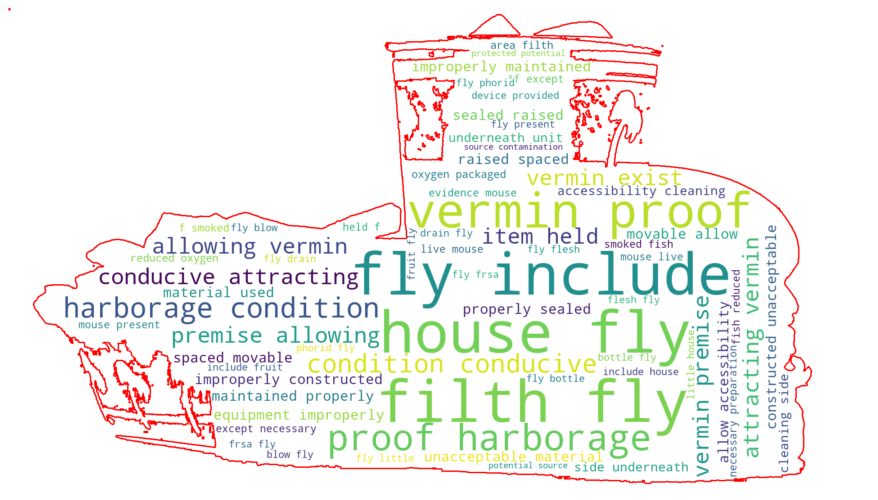

In [142]:
mask = np.array(Image.open('cloud.png'))
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 18,max_font_size = 128,
                stopwords=stopwords,
                mask = mask,random_state=1, contour_width=3, contour_color='red')
wc.generate(s)
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('c_grade_words.pdf')
plt.show()